# Previsão de vendas Paraná Auto peças

Este projeto tem como objetivo realizar uma análise preditiva do faturamento mensal da empresa Paraná Auto Peças, utilizando um modelo de regressão linear simples.

Coeficiente de Regressão (inclinação): 19221.00
Intercepto: 125234.99
R-quadrado: 0.49


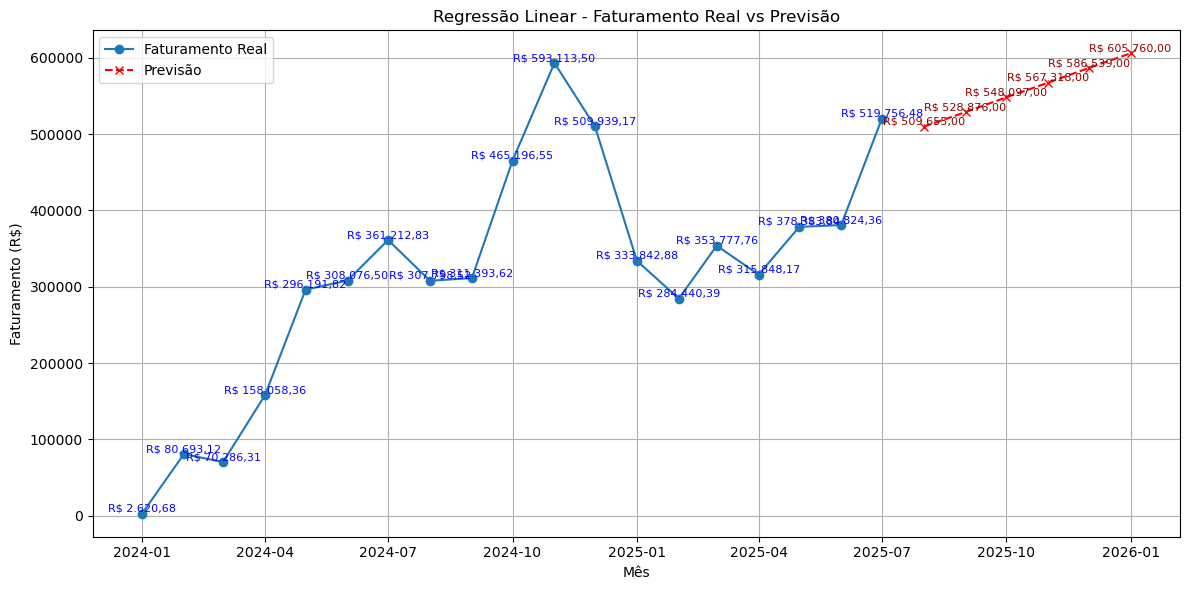

         Mês       Previsão
0 2025-08-01  R$ 509.655,00
1 2025-09-01  R$ 528.876,00
2 2025-10-01  R$ 548.097,00
3 2025-11-01  R$ 567.318,00
4 2025-12-01  R$ 586.539,00
5 2026-01-01  R$ 605.760,00


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# ==== 1. Dados históricos ====
dados = {
    "Mês": [
        "01/01/2024", "01/02/2024", "01/03/2024", "01/04/2024", "01/05/2024", "01/06/2024",
        "01/07/2024", "01/08/2024", "01/09/2024", "01/10/2024", "01/11/2024", "01/12/2024",
        "01/01/2025", "01/02/2025", "01/03/2025", "01/04/2025", "01/05/2025", "01/06/2025", "01/07/2025"
    ],
    "Faturamento Real": [
        "R$ 2.620,68", "R$ 80.693,12", "R$ 70.286,31", "R$ 158.058,36", "R$ 296.191,82", "R$ 308.076,50",
        "R$ 361.212,83", "R$ 307.798,52", "R$ 311.393,62", "R$ 465.196,55", "R$ 593.113,50", "R$ 509.939,17",
        "R$ 333.842,88", "R$ 284.440,39", "R$ 353.777,76", "R$ 315.848,17", "R$ 378.383,84", "R$ 380.824,36", "R$ 519.756,48"
    ]
}

# ==== 2. Preparação dos dados ====
df = pd.DataFrame(dados)
df["Mês"] = pd.to_datetime(df["Mês"], format="%d/%m/%Y")
df["Faturamento Real"] = df["Faturamento Real"].str.replace("R$", "", regex=False).str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)
df["Mes_Num"] = np.arange(1, len(df)+1)

# ==== 3. Treinamento do modelo ====
X = df[["Mes_Num"]]
y = df["Faturamento Real"]
modelo = LinearRegression()
modelo.fit(X, y)

# Adicionar a impressão dos coeficientes e R-quadrado
print(f"Coeficiente de Regressão (inclinação): {modelo.coef_[0]:.2f}")
print(f"Intercepto: {modelo.intercept_:.2f}")

y_pred = modelo.predict(X)
r_quadrado = r2_score(y, y_pred)
print(f"R-quadrado: {r_quadrado:.2f}")

# ==== 4. Previsão de Ago/2025 a Jan/2026 ====
meses_futuros = pd.date_range(start="2025-08-01", end="2026-01-01", freq="MS")
meses_futuros_num = np.arange(len(df)+1, len(df)+1+len(meses_futuros))

# Convertendo o NumPy array para um DataFrame com o nome de coluna correto
X_futuro = pd.DataFrame(meses_futuros_num, columns=["Mes_Num"])
previsoes = modelo.predict(X_futuro)

# ==== 5. Criação do DataFrame de previsões ====
df_prev = pd.DataFrame({
    "Mês": meses_futuros,
    "Previsão": previsoes
})

# Arredondar e formatar como moeda brasileira
df_prev["Previsão"] = df_prev["Previsão"].astype(float).apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

plt.figure(figsize=(12,6))

# Plotar dados reais
plt.plot(df["Mês"], df["Faturamento Real"], marker='o', label="Faturamento Real")
for i, row in df.iterrows():
    plt.text(row["Mês"], row["Faturamento Real"], f"R$ {row['Faturamento Real']:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
             fontsize=8, ha='center', va='bottom', color='blue')

# Plotar previsões
plt.plot(df_prev["Mês"], previsoes, marker='x', linestyle="--", color="red", label="Previsão")
for i, (mes, valor) in enumerate(zip(df_prev["Mês"], previsoes)):
    texto = f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    plt.text(mes, valor, texto, fontsize=8, ha='center', va='bottom', color='darkred')

# Configurações do gráfico
plt.title("Regressão Linear - Faturamento Real vs Previsão")
plt.xlabel("Mês")
plt.ylabel("Faturamento (R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==== 7. Exibir previsões formatadas ====
print(df_prev)